In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
iris = load_iris()

Data Inspection

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#dataset description

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
def z_score_normalize(df):
    return (df - df.mean()) / df.std()

In [8]:
normalized_data = z_score_normalize(df)

In [9]:
normalized_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.515825e-15,-1.894781e-15,-1.515825e-15,-8.526513e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.425820e+00,-1.562342e+00,-1.442245e+00
25%,-8.976739e-01,-5.903951e-01,-1.222456e+00,-1.179859e+00
50%,-5.233076e-02,-1.315388e-01,3.353541e-01,1.320673e-01
75%,6.722490e-01,5.567457e-01,7.602115e-01,7.880307e-01
max,2.483699e+00,3.080455e+00,1.779869e+00,1.706379e+00


Covariance Calculation

In [10]:
def compute_covariance_matrix(normalized_data):
    n_samples = normalized_data.shape[0]
    # Cov(A) = ATA/(n-1)
    cov_matrix = np.dot(normalized_data.T, normalized_data)/(n_samples-1)
    return cov_matrix

In [11]:
cov_matrix = compute_covariance_matrix(normalized_data)

In [12]:
cov_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Eigen values and Eigen Vector Calculation

In [13]:
eigen_values, eigen_vector = np.linalg.eig(cov_matrix)

In [14]:
eigen_values

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [15]:
eigen_vector

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [16]:
b = np.array([2, 1, 3, 4])

In [17]:
#sorting the array and returning the index order of the orignial array
np.argsort(b)

array([1, 0, 2, 3])

In [18]:
#reversing the indices array
np.argsort(b)[::-1]

array([3, 2, 0, 1])

In [19]:
desc_indices = np.argsort(eigen_values)[::-1]

In [20]:
eigen_values = eigen_values[desc_indices]
eigen_vector = eigen_vector[:, desc_indices]

In [21]:
eigen_values

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [22]:
eigen_vector

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [23]:
normalized_data.shape

(150, 4)

In [24]:
eigen_vector.shape

(4, 4)

In [25]:
eigen_vector[:2].shape

(2, 4)

In [51]:
#slicing the first column
normalized_data.iloc[:, 3][0]

np.float64(-1.3110521482051314)

Using For loop for manual computation

In [53]:
cxy = np.zeros((normalized_data.shape[1], normalized_data.shape[1]))

n = normalized_data.shape[0]
n_cols = normalized_data.shape[1]

for i in range(n_cols):
    for j in range(n_cols):
        for k in range(n):
            cxy[i, j] += (normalized_data.iloc[:, i][k]*normalized_data.iloc[:, j][k])/(n-1)
        
cxy

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [54]:
cov_matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [26]:
def data_projection(k):
    top_k_principal_components = eigen_vector[:, :k]
    projected_data = np.dot(normalized_data, top_k_principal_components)
    return projected_data

Projected Data Shape: 
(150, 3)


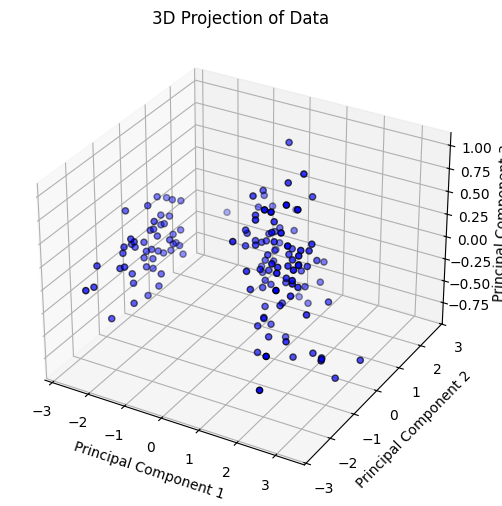

In [27]:
if __name__ == "__main__":
    k = int(input("Input number of principal components (K): "))
    projected_data = data_projection(k)

    print("Projected Data Shape: ")
    print(projected_data.shape)
    if k == 1:
        # Plot in 1D
        plt.figure(figsize=(8, 6))
        plt.scatter(projected_data, np.zeros(150), c='blue', edgecolors='black')
        plt.title('1D Projection of Data')
        plt.xlabel('Data Points')
        plt.ylabel('Projected Value')
        plt.show()
    
    elif k == 2:
        # Plot in 2D
        plt.figure(figsize=(8, 6))
        plt.scatter(projected_data[:, 0], projected_data[:, 1], c='blue', edgecolors='black')
        plt.title('2D Projection of Data')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()
    
    elif k == 3:
        # Plot in 3D
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], c='blue', edgecolors='black')
        ax.set_title('3D Projection of Data')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.show()